In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

# Question 7

---

#### 1. Write a function rotImage which rotates an input image about its center.

In [21]:
def rotImage(im, deg, retain):
    im = np.int32(im)
    m, n = im.shape
    
    # Coordinates in input image
    x, y = np.meshgrid(np.arange(n), np.arange(m))
    x = x - np.mean(x, axis=1, keepdims=True)
    y = y - np.mean(y, axis=0, keepdims=True)
    y = np.flip(y, axis=0)
    
    # Rotation matrix
    mat = np.array([[np.cos(deg*np.pi/180), np.sin(deg*np.pi/180)],
                   [-np.sin(deg*np.pi/180), np.cos(deg*np.pi/180)]])
    
    # Inverse of rotation matrix
    mat_inv = np.linalg.inv(mat)
    
    # Finding output image's size
    if retain:
        m1, n1 = m, n
        
    else:
        tmp = np.array([[x[0][0], x[0][-1], x[-1][0], x[-1][-1]], [y[0][0], y[0][-1], y[-1][0], y[-1][-1]]])
        new = np.matmul(mat, tmp)
        
        n_min = np.min(new, axis=1)
        n_max = np.max(new, axis=1)
        
        n1, m1 = np.int32(n_max - n_min + 1)
        
    # Coordinates in output image
    x1, y1 = np.meshgrid(np.arange(n1), np.arange(m1))
    x1 = x1 - np.mean(x1, axis=1, keepdims=True)
    y1 = y1 - np.mean(y1, axis=0, keepdims=True)
    y1 = np.flip(y1, axis=0)
        
    ret = np.zeros((m1, n1))
    cm = m//2
    cn = n//2
    
    # Implementation of backward mapping
    for i in range(m1):
        for j in range(n1):
            tmp = np.array([[x1[i][j]], [y1[i][j]]])
            new = np.matmul(mat_inv, tmp)
            new = np.int32(new)
            xn, yn = cm-new[1][0], cn+new[0][0]
            
            if xn >= 0 and xn < m and yn >= 0 and yn < n:
                ret[i][j] = im[xn][yn]
            
    return np.uint8(ret)

#### 2. Show outputs of a rectangular image of your choice with angle 30 deg, 45 deg , 90 deg and 2 other angles of your choice.

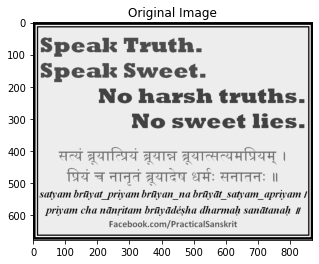

In [22]:
im = cv2.imread('../images/colourful_text.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

plt.imshow(im, cmap='gray')
plt.title('Original Image')
plt.show()

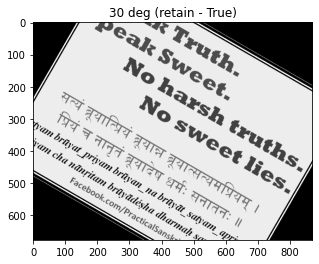

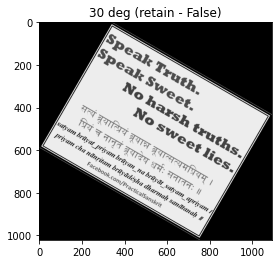

In [23]:
ret = rotImage(im, 30, True)
plt.imshow(ret, cmap='gray')
plt.title('30 deg (retain - True)')
plt.show()

ret = rotImage(im, 30, False)
plt.imshow(ret, cmap='gray')
plt.title('30 deg (retain - False)')
plt.show()

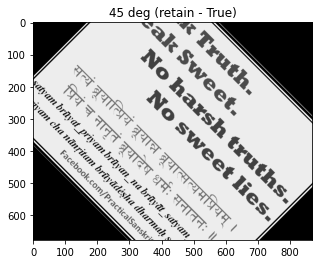

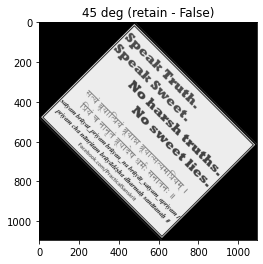

In [24]:
ret = rotImage(im, 45, True)
plt.imshow(ret, cmap='gray')
plt.title('45 deg (retain - True)')
plt.show()

ret = rotImage(im, 45, False)
plt.imshow(ret, cmap='gray')
plt.title('45 deg (retain - False)')
plt.show()

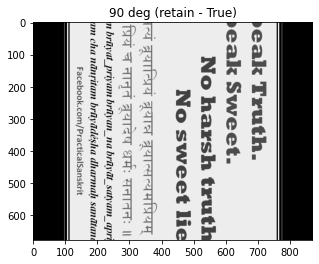

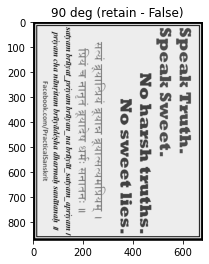

In [25]:
ret = rotImage(im, 90, True)
plt.imshow(ret, cmap='gray')
plt.title('90 deg (retain - True)')
plt.show()

ret = rotImage(im, 90, False)
plt.imshow(ret, cmap='gray')
plt.title('90 deg (retain - False)')
plt.show()

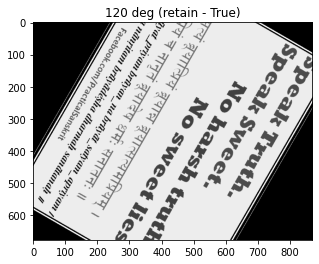

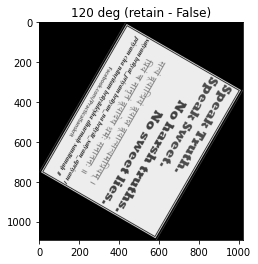

In [26]:
ret = rotImage(im, 120, True)
plt.imshow(ret, cmap='gray')
plt.title('120 deg (retain - True)')
plt.show()

ret = rotImage(im, 120, False)
plt.imshow(ret, cmap='gray')
plt.title('120 deg (retain - False)')
plt.show()

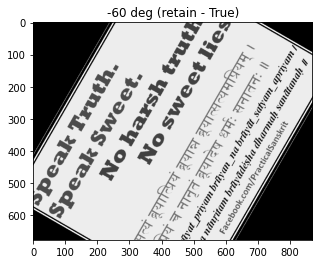

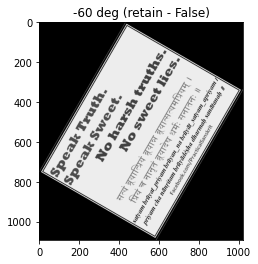

In [27]:
ret = rotImage(im, -60, True)
plt.imshow(ret, cmap='gray')
plt.title('-60 deg (retain - True)')
plt.show()

ret = rotImage(im, -60, False)
plt.imshow(ret, cmap='gray')
plt.title('-60 deg (retain - False)')
plt.show()